In [2]:
import sklearn
print(sklearn.__version__)
import numpy
import scipy
import matplotlib
import pandas
import sys
print(numpy.__version__)
print(scipy.__version__)
print(matplotlib.__version__)
print(pandas.__version__)
print(sys.version)



0.23.2
1.19.2
1.5.2
3.3.2
1.1.3
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [1]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names = names)

#shape
#print(dataset.shape)

#peak data
#print(dataset.head(30))

#description of data
#print(dataset.describe())

#class disctribution
#print(dataset.groupby('class').size())

In [33]:
#box and whisker plots
#dataset.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False)
#dataset.hist()

#scatter matrix
#scatter_matrix(dataset)
#pyplot.show()


In [2]:
#creating validation dataset 
#splitting the data
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train ,Y_validation, = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [3]:
#creating models
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = 'ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma ='auto')))

#evaluating each model in turn
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)'%(name, cv_results.mean(), cv_results.std()))
    




LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


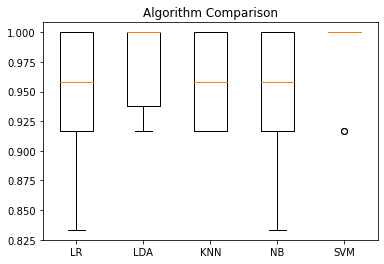

In [11]:
#comparing algorithms 

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [15]:
#to make predictions 
model = SVC(gamma = 'auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

#to evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

